In [1]:
import tensorflow

In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import csv
import os, shutil

In [3]:
# re-size all the images
Image_size=[224,224]
train_path='/content/drive/MyDrive/Chest X-ray images/train'
test_path='/content/drive/MyDrive/Chest X-ray images/test'
validation_path='/content/drive/MyDrive/Chest X-ray images/val'


In [4]:
train_path

'/content/drive/MyDrive/Chest X-ray images/train'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will use imagenet weights

resnet=ResNet50(input_shape=Image_size+[3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable=False



In [7]:
# Useful for getting number of output classes
folders=glob('/content/drive/MyDrive/Chest X-ray images/train/*')

In [8]:
# our layers
X=Flatten()(resnet.output)

In [9]:
prediction=Dense(len(folders), activation='softmax')(X)

# create a model object
model=Model(inputs=resnet.input, outputs=prediction)

In [10]:
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)


In [13]:
# Make sure we provide the same target size as initiated for the image size
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Chest X-ray images/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 4192 images belonging to 2 classes.


In [14]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Chest X-ray images/test',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 630 images belonging to 2 classes.


In [15]:
#Fit the model
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=20,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set)
                      )

<ipython-input-15-89a79a1f7c23>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,


Epoch 1/20
131/131 [==============================] - 1352s 10s/step - loss: 0.7770 - accuracy: 0.7615 - val_loss: 0.3764 - val_accuracy: 0.8397
Epoch 2/20
131/131 [==============================] - 110s 841ms/step - loss: 0.3133 - accuracy: 0.8619 - val_loss: 0.4250 - val_accuracy: 0.8016
Epoch 3/20
131/131 [==============================] - 95s 724ms/step - loss: 0.3059 - accuracy: 0.8702 - val_loss: 1.0935 - val_accuracy: 0.6508
Epoch 4/20
131/131 [==============================] - 96s 731ms/step - loss: 0.3107 - accuracy: 0.8721 - val_loss: 0.3614 - val_accuracy: 0.8429
Epoch 5/20
131/131 [==============================] - 112s 855ms/step - loss: 0.2454 - accuracy: 0.9029 - val_loss: 0.7043 - val_accuracy: 0.7444
Epoch 6/20
131/131 [==============================] - 99s 756ms/step - loss: 0.2628 - accuracy: 0.8900 - val_loss: 0.4047 - val_accuracy: 0.8429
Epoch 7/20
131/131 [==============================] - 111s 846ms/step - loss: 0.2296 - accuracy: 0.9053 - val_loss: 1.1337 - val

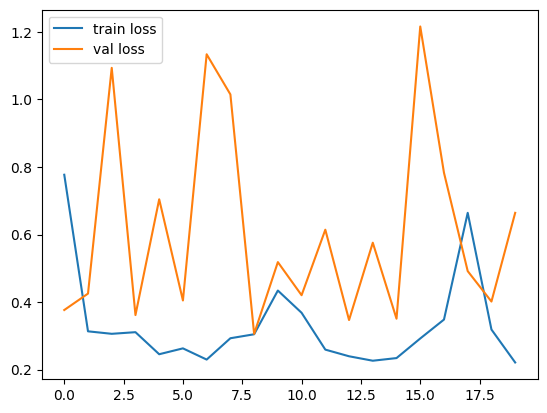

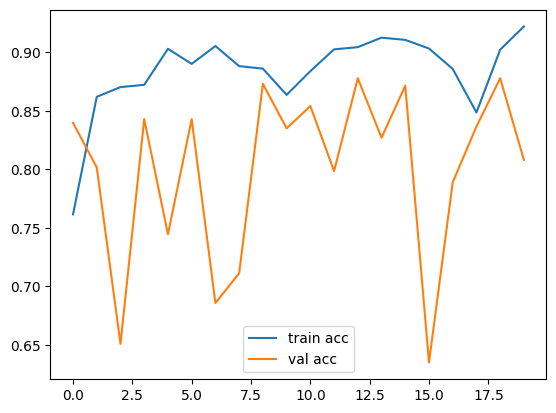

In [17]:
#Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Plot the Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [35]:
#Testing
import numpy as np

test_image=image.load_img('/content/drive/MyDrive/Chest X-ray images/val/opacity/person1397_virus_2400.jpeg', target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result=model.predict(test_image)
training_set.class_indices
if result[0][0]==1:
  prediction='normal'
else:
  prediction='opacity'



1/1 [==============================] - 1s 1s/step


In [36]:
print(prediction)

opacity


In [37]:
# Save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [38]:
y_pred=model.predict(test_set)

20/20 [==============================] - 8s 362ms/step


In [39]:
y_pred

array([[2.2524486e-01, 7.7475506e-01],
       [1.9498410e-03, 9.9805021e-01],
       [1.1003412e-02, 9.8899662e-01],
       ...,
       [2.6553115e-04, 9.9973446e-01],
       [6.6183263e-01, 3.3816743e-01],
       [2.6045011e-05, 9.9997401e-01]], dtype=float32)